In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

mTrain = 1000  # size of training data
mTest = 100  # size of test data
K = 10  # number of categories
n = 20  # number of features

A_true = np.random.randn(K, n)
b_true = np.random.randn(K, 1)
v = 0.2 * np.random.randn(K, mTrain + mTest)  # noise
data = np.random.randn(n, mTrain + mTest)
label = np.argmax(np.dot(A_true, data) + np.dot(b_true, np.ones((1, mTrain + mTest))) + v, axis=0)

# training data
x = data[:, :mTrain]
y = label[:mTrain]

# test data
xtest = data[:, mTrain:]
ytest = label[mTrain:]

In [201]:
a=f[:,np.where(mask)[0]]
a[ind]

Expression(AFFINE, UNKNOWN, (9, 100))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


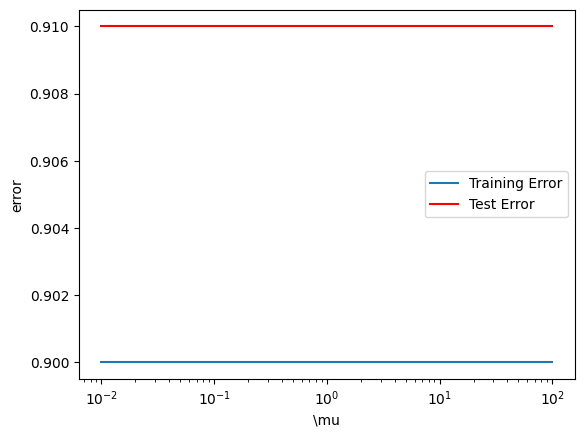

In [203]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# define mus
mus = np.power(10, np.arange(-2, 2.25, 0.25))

# initialize error lists
errorTrain = []
errorTest = []

for mu in mus:
    # define variables and expressions
    A = cp.Variable((K, n))
    b = cp.Variable((K,1))
    f = A @ x + b @ np.ones([1, mTrain])
    L = 0
    for k in range(K):
        # process all examples with y_i = k simultaneously
        ind = np.concatenate((np.arange(k), np.arange(k + 1, K)))
        mask = (y == k).reshape(-1, 1)
        a=f[:,np.where(mask)[0]]
        L += cp.sum(cp.pos(1 + cp.max(a[ind], axis=0) - f[k, np.where(mask)[0]]))

    # define problem
    objective = cp.Minimize(L + mu * cp.sum_squares(A))
    constraints = [cp.sum(b) == 0]
    prob = cp.Problem(objective, constraints)

    # solve problem
    prob.solve(solver = cp.SCS)

    # get indices and errors
    indTrain = np.argmax(A @ x + b @ np.ones([1, mTrain]), axis=0)
    errorTrain.append(np.sum(indTrain != y) / mTrain)
    indTest = np.argmax(A @ xtest + b @ np.ones([1, mTest]), axis=0)
    errorTest.append(np.sum(indTest != ytest) / mTest)

# plot
plt.semilogx(mus, errorTrain)
plt.semilogx(mus, errorTest, 'r')
plt.xlabel('\mu')
plt.ylabel('error')
plt.legend(['Training Error', 'Test Error'])
plt.savefig('multi_label_svm.eps', format='eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


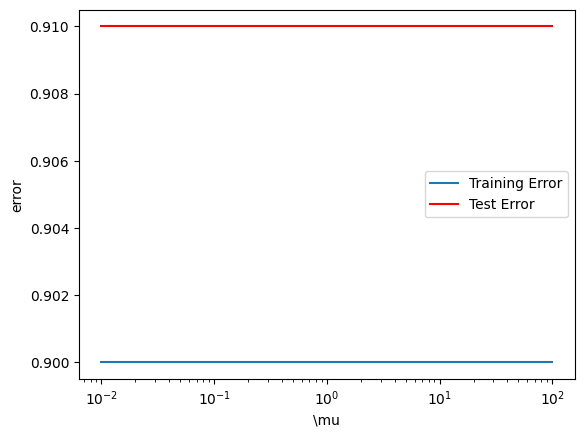

In [13]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# define mus
mus = np.power(10, np.arange(-2, 2.25, 0.25))

# initialize error lists
errorTrain = []
errorTest = []

for mu in mus:
    # define variables and expressions
    A = cp.Variable((K, n))
    b = cp.Variable((K,1))
    f = A @ x + b @ np.ones([1, mTrain])
    L = 0
    for k in range(K):
        # process all examples with y_i = k simultaneously
        ind = np.concatenate((np.arange(k), np.arange(k + 1, K)))
        mask = (y == k).reshape(-1, 1)
        a=f[:,np.where(mask)[0]]
        L += cp.sum(cp.pos(1 + cp.max(a[ind], axis=0) - f[k, np.where(mask)[0]]))

    # define problem
    objective = cp.Minimize(L + mu * cp.sum(A**2))
    constraints = [cp.sum(b) == 0]
    prob = cp.Problem(objective, constraints)

    # solve problem
    prob.solve(solver = cp.SCS)

    # get indices and errors
    indTrain = np.argmax(A @ x + b @ np.ones([1, mTrain]), axis=0)
    errorTrain.append(np.sum(indTrain != y) / mTrain)
    indTest = np.argmax(A @ xtest + b @ np.ones([1, mTest]), axis=0)
    errorTest.append(np.sum(indTest != ytest) / mTest)

# plot
plt.semilogx(mus, errorTrain)
plt.semilogx(mus, errorTest, 'r')
plt.xlabel('\mu')
plt.ylabel('error')
plt.legend(['Training Error', 'Test Error'])
plt.savefig('multi_label_svm.eps', format='eps')

In [11]:
z=np.ones([10,10])
c=cp.Variable((K, n))
t=np.array([[True,True,True],[True,True,True],[False,True,True]])
cp.sum_squares(A),cp.sum(A**2)

(Expression(CONVEX, NONNEGATIVE, ()), Expression(CONVEX, NONNEGATIVE, ()))